In [12]:
# Dependencies 
import pandas as pd
import numpy as np
import requests
import time
import json
import matplotlib.pyplot as plt
from citipy import citipy

# API Key
import api_keys

# Range of Latitude and Longitude
lat_range = (-90, 90)
lng_range = (-180, 180)

In [9]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

In [10]:
# OpenWeatherMap API Key
api_key = key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("------- Starting Data Retrieval -------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Date": city_date, 
                          "Lat": city_lat, 
                          "Lng": city_lng,
                          "Country": city_country,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind})

    # If an error is experienced, skip the city
    except:
        print("Could not find City. Skip...")
        pass
              
print("----- Retrieval Complete -----")

------- Beginning Data Retrieval -------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | mayabon
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | atar
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | pevek
Processing Record 9 of Set 1 | yunjinghong
Could not find City. Skip...
Processing Record 10 of Set 1 | jamestown
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | astoria
Processing Record 13 of Set 1 | tommot
Processing Record 14 of Set 1 | buchanan
Processing Record 15 of Set 1 | okha
Processing Record 16 of Set 1 | omsukchan
Processing Record 17 of Set 1 | severo-kurilsk
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | mersing
Processing Record 20 of Set 1 | labutta
Could not find City. Skip...
Processing Record 21 of Set 1 | nikolskoye
Processing Record 22 of Set 1 | raudeberg
Processing Re

Processing Record 36 of Set 4 | gorlice
Processing Record 37 of Set 4 | maldonado
Processing Record 38 of Set 4 | gizo
Processing Record 39 of Set 4 | bandarbeyla
Processing Record 40 of Set 4 | mar del plata
Processing Record 41 of Set 4 | beringovskiy
Processing Record 42 of Set 4 | karacakoy
Processing Record 43 of Set 4 | kungurtug
Processing Record 44 of Set 4 | mehamn
Processing Record 45 of Set 4 | abha
Processing Record 46 of Set 4 | eydhafushi
Processing Record 47 of Set 4 | artemisa
Processing Record 48 of Set 4 | tumannyy
Could not find City. Skip...
Processing Record 49 of Set 4 | severo-yeniseyskiy
Processing Record 0 of Set 5 | san patricio
Processing Record 1 of Set 5 | pisco
Processing Record 2 of Set 5 | teya
Processing Record 3 of Set 5 | sakakah
Could not find City. Skip...
Processing Record 4 of Set 5 | guaiba
Processing Record 5 of Set 5 | inhambane
Processing Record 6 of Set 5 | yulara
Processing Record 7 of Set 5 | amderma
Could not find City. Skip...
Processing 

Processing Record 23 of Set 8 | xiangfan
Could not find City. Skip...
Processing Record 24 of Set 8 | bogorodskoye
Processing Record 25 of Set 8 | vestmanna
Processing Record 26 of Set 8 | aksarka
Processing Record 27 of Set 8 | dryden
Processing Record 28 of Set 8 | ajdabiya
Processing Record 29 of Set 8 | marawi
Processing Record 30 of Set 8 | buala
Processing Record 31 of Set 8 | aklavik
Processing Record 32 of Set 8 | geraldton
Processing Record 33 of Set 8 | madison
Processing Record 34 of Set 8 | dalvik
Processing Record 35 of Set 8 | pekalongan
Processing Record 36 of Set 8 | mys shmidta
Could not find City. Skip...
Processing Record 37 of Set 8 | bull savanna
Processing Record 38 of Set 8 | urdzhar
Could not find City. Skip...
Processing Record 39 of Set 8 | axim
Processing Record 40 of Set 8 | saldanha
Processing Record 41 of Set 8 | inderborskiy
Could not find City. Skip...
Processing Record 42 of Set 8 | agva
Could not find City. Skip...
Processing Record 43 of Set 8 | dharc

Processing Record 5 of Set 12 | chengzihe
Processing Record 6 of Set 12 | wulanhaote
Could not find City. Skip...
Processing Record 7 of Set 12 | belaya gora
Processing Record 8 of Set 12 | pietarsaari
Could not find City. Skip...
Processing Record 9 of Set 12 | santiago
Processing Record 10 of Set 12 | tome-acu
Could not find City. Skip...
Processing Record 11 of Set 12 | divnomorskoye
Processing Record 12 of Set 12 | kutum
Processing Record 13 of Set 12 | waipawa
Processing Record 14 of Set 12 | acarau
Could not find City. Skip...
Processing Record 15 of Set 12 | flin flon
Processing Record 16 of Set 12 | sainte-maxime
Processing Record 17 of Set 12 | yar-sale
Processing Record 18 of Set 12 | miraflores
Processing Record 19 of Set 12 | chuy
Processing Record 20 of Set 12 | coihaique
Processing Record 21 of Set 12 | ust-uda
Processing Record 22 of Set 12 | klaksvik
Processing Record 23 of Set 12 | moca
Processing Record 24 of Set 12 | argentan
Processing Record 25 of Set 12 | podor
Pr

In [22]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
# city_data_pd.to_csv(output_data_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          554
Cloudiness    554
Country       554
Date          554
Humidity      554
Lat           554
Lng           554
Max Temp      554
Wind Speed    554
dtype: int64

In [15]:
# Display the City Data Frame
city_data_pd.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,yellowknife,75,CA,1534791600,59,62.45,-114.38,62.60,8.05
1,atuona,48,PF,1534796687,100,-9.80,-139.03,77.66,4.83
2,mayabon,20,PH,1534796687,98,9.10,123.17,79.01,4.61
3,qaanaaq,8,GL,1534796624,86,77.48,-69.36,41.21,4.94
4,barrow,44,AR,1534796491,56,-38.31,-60.23,46.61,2.37


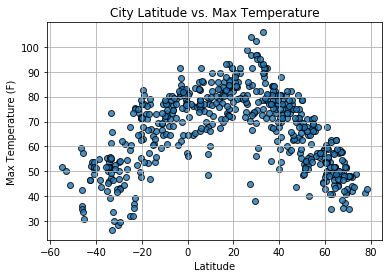

In [27]:
                   ## ----- LATITUDE VS HUMIDITY PLOT ----- ##
# Build scatter plot for latitude vs temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

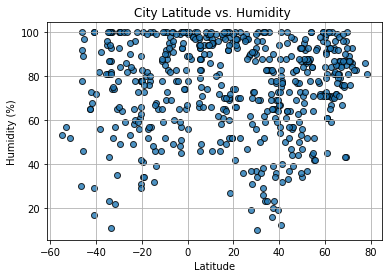

In [30]:
                 ## ----- LATITUDE VS CLOUDINESS PLOT ----- ##
# Scatter plot for each city
plt.scatter(lats, humidity, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Humidity ")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

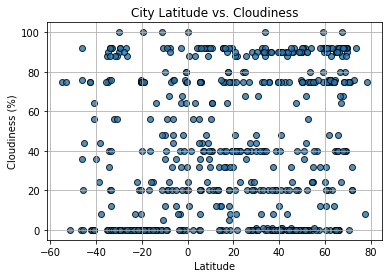

In [28]:
                  ## ------ LATITUDE vs. WIND SPEED ----- ##
# Scatter plots for each city types
plt.scatter(lats, cloudiness, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()

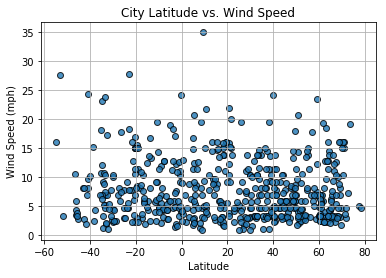

In [29]:
                  ## ----- CITY LATITUDE vs. WIND SPEED ----- ##
# Scatter plots for city types
plt.scatter(lats, wind_speed, edgecolor="black", linewidths=1, marker="o", alpha=0.8, label="Cities")

# Graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Show plot
plt.show()